In [1]:
from matplotlib import colors, cm
import matplotlib.pyplot as plt


import numpy as np
import math
import time
import utpy.utils
import utpy.vis
import flatpy

ModuleNotFoundError: No module named 'utpy'

In [60]:
# MC sampling
# make sure a<b for each interval below

#X1
t1 = 5
p1 = 10
#X2
t2 = 7
p2 = 15
#X3
t3 = 1
p3 = 4
#X4
t4 = 7
p4 = 13
#X5
t5 = 3
p5 = 10

numSamples = 100000

x1Samples = np.random.uniform(low=t1, high=p1, size=(1,numSamples))
x2Samples = np.random.uniform(low=t2, high=p2, size=(1,numSamples))
x3Samples = np.random.uniform(low=t3, high=p3, size=(1,numSamples))
x4Samples = np.random.uniform(low=t4, high=p4, size=(1,numSamples))
x5Samples = np.random.uniform(low=t5, high=p5, size=(1,numSamples))

numSaddle = 0

for k in range(numSamples):
    if ((x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] > x5Samples[0,k])):
        numSaddle = numSaddle + 1
        
print('x1 saddle probability', numSaddle/numSamples)    
    

superOptimizedSaddleProb = superOptimizedSystematicComputeSaddleProbability(t1,p1,t2,p2,t3,p3,t4,p4,t5,p5)
print('Saddle probability using super optimized code', superOptimizedSaddleProb)

x1 saddle probability 0.45406
Saddle probability using super optimized code 0.4513392857142857


In [61]:
def computeIntegral(l, h,l3=None,l5=None,h2=None,h4=None,n1=1,n2=1,n3=1,n4=1,n5=1):
    
    intUp=0
    intDown=0
    
    
    # In normalizers below, set all n1..n5 each to 1 except for those that are being used. Product with 1 should give 
    # same value
    
    if (l3 is None) and (l5 is None) and (h2 is not None) and (h4 is None):
    
        intUp = (1/(n1*n2*n3*n4*n5))* (h2*h - h*h/2)
        intDown = (1/(n1*n2*n3*n4*n5))* (h2*l - l*l/2)
        
    elif (l3 is None) and (l5 is None) and (h2 is None) and (h4 is not None):
    
        intUp = (1/(n1*n2*n3*n4*n5))* (h4*h - h*h/2)
        intDown = (1/(n1*n2*n3*n4*n5))* (h4*l - l*l/2)
        
   ###########################     
        
    elif (l3 is not None) and (l5 is None) and (h2 is None) and (h4 is None):
       
        intUp = (1/(n1*n2*n3*n4*n5))* (h*h/2 - l3*h)
        intDown = (1/(n1*n2*n3*n4*n5))* (l*l/2 - l3*l)
        
        
    elif (l3 is None) and (l5 is not None) and (h2 is None) and (h4 is None):
       
        intUp = (1/(n1*n2*n3*n4*n5))* (h*h/2 - l5*h)
        intDown = (1/(n1*n2*n3*n4*n5))* (l*l/2 - l5*l)
        
    ###########################    
        
      
    elif (l3 is not None) and (l5 is not None) and (h2 is None) and (h4 is None):
        
        intUp = (1/(n1*n2*n3*n4*n5))* (1/6)*h*(6*l3*l5 - 3*l3*h -3*l5*h + 2*h*h)
        intDown = (1/(n1*n2*n3*n4*n5))* (1/6)*l*(6*l3*l5 - 3*l3*l -3*l5*l + 2*l*l)
        
        
    ############################    
        
        
    elif (l3 is None) and (l5 is None) and (h2 is not None) and (h4 is not None):
     
        intUp = (1/(n1*n2*n3*n4*n5))* (1/6)*h*(6*h2*h4 - 3*h2*h -3*h4*h + 2*h*h)
        intDown = (1/(n1*n2*n3*n4*n5))* (1/6)*l*(6*h2*h4 - 3*h2*l -3*h4*l + 2*l*l)
        
    ############################    
        
      
    elif (l3 is not None) and (l5 is None) and (h2 is not None) and (h4 is None):
        
        intUp = (1/(n1*n2*n3*n4*n5))* ((1/2)*h*h*(h2+l3) - h2*l3*h - (h**3)/3)
        intDown = (1/(n1*n2*n3*n4*n5))* ((1/2)*l*l*(h2+l3) - h2*l3*l - (l**3)/3)
        
    elif (l3 is None) and (l5 is not None) and (h2 is not None) and (h4 is None):
        
        intUp = (1/(n1*n2*n3*n4*n5))* ((1/2)*h*h*(h2+l5) - h2*l5*h - (h**3)/3)
        intDown = (1/(n1*n2*n3*n4*n5))* ((1/2)*l*l*(h2+l5) - h2*l5*l - (l**3)/3)
        
    elif (l3 is not None) and (l5 is None) and (h2 is None) and (h4 is not None):
        
        intUp = (1/(n1*n2*n3*n4*n5))* ((1/2)*h*h*(h4+l3) - h4*l3*h - (h**3)/3)
        intDown = (1/(n1*n2*n3*n4*n5))* ((1/2)*l*l*(h4+l3) - h4*l3*l - (l**3)/3)   
      
    elif (l3 is None) and (l5 is not None) and (h2 is None) and (h4 is not None):
        
        intUp = (1/(n1*n2*n3*n4*n5))* ((1/2)*h*h*(h4+l5) - h4*l5*h - (h**3)/3)
        intDown = (1/(n1*n2*n3*n4*n5))* ((1/2)*l*l*(h4+l5) - h4*l5*l - (l**3)/3)
        
    ###############################    
        
    elif (l3 is not None) and (l5 is not None) and (h2 is not None) and (h4 is None):
        
        intUp = (1/(n1*n2*n3*n4*n5))* (1/12)*h*(4*h*h*(h2 + l3 + l5) - 6*h*(h2*l3 + h2*l5 + l3*l5) + 12*h2*l3*l5 - 3*(h**3))
        intDown = (1/(n1*n2*n3*n4*n5))* (1/12)*l*(4*l*l*(h2 + l3 + l5) - 6*l*(h2*l3 + h2*l5 + l3*l5) + 12*h2*l3*l5 - 3*(l**3))
    
    elif (l3 is not None) and (l5 is not None) and (h2 is None) and (h4 is not None):
        
        intUp = (1/(n1*n2*n3*n4*n5))* (1/12)*h*(4*h*h*(h4 + l3 + l5) - 6*h*(h4*l3 + h4*l5 + l3*l5) + 12*h4*l3*l5 - 3*(h**3))
        intDown = (1/(n1*n2*n3*n4*n5))* (1/12)*l*(4*l*l*(h4 + l3 + l5) - 6*l*(h4*l3 + h4*l5 + l3*l5) + 12*h4*l3*l5 - 3*(l**3))
    
    ###############################
    
    
    elif (l3 is not None) and (l5 is None) and (h2 is not None) and (h4 is not None):
    
        intUp = (1/(n1*n2*n3*n4*n5))* (1/12)*h*(-4*h*h*(h2 + h4 + l3) + 6*h*(h2*l3 + h2*h4 + h4*l3) - 12*h2*h4*l3 + 3*(h**3))
        intDown = (1/(n1*n2*n3*n4*n5))* (1/12)*l*(-4*l*l*(h2 + h4 + l3) + 6*l*(h2*l3 + h2*h4 + h4*l3) - 12*h2*h4*l3 + 3*(l**3))
    
    elif (l3 is None) and (l5 is not None) and (h2 is not None) and (h4 is not None):
    
        intUp = (1/(n1*n2*n3*n4*n5))* (1/12)*h*(-4*h*h*(h2 + h4 + l5) + 6*h*(h2*l5 + h2*h4 + h4*l5) - 12*h2*h4*l5 + 3*(h**3))
        intDown = (1/(n1*n2*n3*n4*n5))* (1/12)*l*(-4*l*l*(h2 + h4 + l5) + 6*l*(h2*l5 + h2*h4 + h4*l5) - 12*h2*h4*l5 + 3*(l**3))
    
    
    ###############################
    
    
    elif (l3 is not None) and (l5 is not None) and (h2 is not None) and (h4 is not None):
    
        intUp = (1/(n1*n2*n3*n4*n5))*((-0.25)*(h**4)*(h2+h4+l3+l5) + (1/3)*(h**3)*(h2*h4 + h2*l3 + h2*l5 + h4*l3 + h4*l5 + l3*l5) - (0.5)*h*h*(h2*h4*l3 + h2*h4*l5 + h2*l3*l5 + h4*l3*l5) + h2*h4*l3*l5*h + (h**5)/5)
        intDown = (1/(n1*n2*n3*n4*n5))*((-0.25)*(l**4)*(h2+h4+l3+l5) + (1/3)*(l**3)*(h2*h4 + h2*l3 + h2*l5 + h4*l3 + h4*l5 + l3*l5) - (0.5)*l*l*(h2*h4*l3 + h2*h4*l5 + h2*l3*l5 + h4*l3*l5) + h2*h4*l3*l5*l + (l**5)/5)
    
    ###############################
    
    elif (l3 is None) and (l5 is None) and (h2 is None) and (h4 is None):
    
        intUp = (1/(n1*n2*n3*n4*n5))*h
        intDown = (1/(n1*n2*n3*n4*n5))*l
    
    return (intUp-intDown)   

In [62]:
# a2,b3 < aP < a4,b5
def superOptimizedSystematicCase(indexOfaP, indexOfbP, x1Limits, aP, bP, a1, b1, a2, b2, a3, b3, a4, b4, a5, b5):
    
    w1 = b1-a1
    w2 = b2-a2
    w3 = b3-a3
    w4 = b4-a4
    w5 = b5-a5
    
    l = x1Limits[indexOfaP]
    h = x1Limits[indexOfaP+1]
    
    tempd3 = a3
    tempd5 = a5
    tempu2 = None
    tempu4 = None
    tempn1 = w1
    tempn2 = 1
    tempn3 = w3
    tempn4 = 1
    tempn5 = w5
    
    # Determine initial integral
    for k in range(indexOfaP):
        
        if (x1Limits[k] == a2):
            tempu2 = b2
            tempn2 = w2
            
        if (x1Limits[k] == a4):
            tempu4 = b4
            tempn4 = w4
            
        if (x1Limits[k] == b3):
            tempd3 = None
            tempn3 = 1
            
        if (x1Limits[k] == b5):
            tempd5 = None
            tempn5 = 1
            
    saddleProb = computeIntegral(l, h,l3=tempd3,l5=tempd5,h2=tempu2,h4=tempu4,n1=tempn1,n2=tempn2,n3=tempn3,n4=tempn4,n5=tempn5)
      
    # Depending on how limits are observed, integrate each piece    
    for i in range(indexOfaP+1,indexOfbP):
                
        l = x1Limits[i]
        h = x1Limits[i+1]
                
        if (x1Limits[i] == b3):
            tempd3 = None
            tempn3 = 1
                
        if (x1Limits[i] == b5):
            tempd5 = None
            tempn5 = 1
            
        if (x1Limits[i] == a2):
            tempu2 = b2
            tempn2 = w2
            
        if (x1Limits[i] == a4):
            tempu4 = b4
            tempn4 = w4
            
        saddleProb = saddleProb + computeIntegral(l, h,l3=tempd3,l5=tempd5,h2=tempu2,h4=tempu4,n1=tempn1,n2=tempn2,n3=tempn3,n4=tempn4,n5=tempn5)
    
    return saddleProb

In [63]:
def swap(a,b):
    temp = a
    a = b
    b = temp
    
    return a,b

In [64]:
def superOptimizedSystematicComputeSaddleProbability(a1,b1,a2,b2,a3,b3,a4,b4,a5,b5):
    
    # New, hopefully simpler logic
    aP = max([a1,a3,a5])
    #print('aP:',aP)

    bP = min([b1,b2,b4])
    #print('bP:',bP)

    
    # Go through list of intervals sorted by their starting points, and find interval from end of sorted list which 
    # contains bMin
    
    # Without loss of generality, assume a2 < a4 and b3 < b5
    if (a2 > a4):
        a2,a4 = swap(a2,a4)
        b2,b4 = swap(b2,b4)
    if (b3 > b5):
        a3,a5 = swap(a3,a5)
        b3,b5 = swap(b3,b5)
    
    
    I1 = [a1,b1]
    I2 = [a2,b2]
    I3 = [a3,b3]
    I4 = [a4,b4]
    I5 = [a5,b5]

    saddleProb = 0

    if (aP >= bP):

        saddleProb = 0

    else:
        
        # get interval order based on starting points
        interestPointList = [aP, bP, a2, a4, b3, b5]
        
        # Sort aP, bP, a2, a4, b3, and b5
        x1Limits = np.sort(interestPointList)
        
        # Find index of aP and bP in x1Limits array
        indexOfaP = 0
        indexOfbP = 0
        for i in reversed(range(6)):
        
            if (x1Limits[i] == aP):
                indexOfaP = i
                break
    
        # Find index bP in x1Limits array
        for i in range(6):
        
            if (x1Limits[i] == bP):
                indexOfbP = i
                break
                
        # Integration will go from indexOfaP to indexOfbP in the xLimits array
        # Once starting integral is figured for a particular case, integrals for next pieces depend on the limit
        # that is reached
        
        saddleProb = superOptimizedSystematicCase(indexOfaP, indexOfbP, x1Limits, aP, bP, a1, b1, a2, b2, a3, b3, a4, b4, a5, b5)
        
        
    return saddleProb

In [54]:
# Monte Carlo Sampling to compute saddle probabilities for ensembles
# TODO: Handle voxel probabilities on domain boundaries
def MCSaddleProbabilityIndependentUniformWithBoundaryNotHandled(ensemble, numSamples):
    
    h, w, d = ensemble.shape
            
    minimumGrid = np.amin(ensemble, axis=2)
    maximumGrid = np.amax(ensemble, axis=2)    
        
    # perform sampling
    #numSamples = 10000
    saddleProbabilities = np.zeros((h,w))
    
    for i in range(h):
        for j in range(w):    
               
            # Compute empirically how frequently point is local maximum
            numTimesSaddle = 0 
            saddleProbability = 0    
            if i >=1 and i<=h-2 and j >=1 and j<=w-2 :
                
                # Vertex order is really important!!
                #Estimate mean and covariance matrices from samples
                x1min = minimumGrid[i,j]
                x1max = maximumGrid[i,j]
                x2min = minimumGrid[i+1,j]
                x2max = maximumGrid[i+1,j]
                x3min = minimumGrid[i,j-1]
                x3max = maximumGrid[i,j-1]
                x4min = minimumGrid[i-1,j]
                x4max = maximumGrid[i-1,j]
                x5min = minimumGrid[i,j+1]
                x5max = maximumGrid[i,j+1]
                #x6min = minimumGrid[i+1,j-1]
                #x6max = maximumGrid[i+1,j-1]
                #x7min = minimumGrid[i+1,j+1]
                #x7max = maximumGrid[i+1,j+1]
                #x8min = minimumGrid[i-1,j-1]
                #x8max = maximumGrid[i-1,j-1]
                #x9min = minimumGrid[i-1,j+1]
                #x9max = maximumGrid[i-1,j+1]
                         
                x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
                x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
                x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
                x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))
                x5Samples = np.random.uniform(low=x5min, high=x5max, size=(1,numSamples))
                #x6Samples = np.random.uniform(low=x6min, high=x6max, size=(1,numSamples))
                #x7Samples = np.random.uniform(low=x7min, high=x7max, size=(1,numSamples))
                #x8Samples = np.random.uniform(low=x8min, high=x8max, size=(1,numSamples))
                #x9Samples = np.random.uniform(low=x9min, high=x9max, size=(1,numSamples))
            
                for k in range(numSamples):    
                    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] > x5Samples[0,k]):    
                        numTimesSaddle = numTimesSaddle + 1
                        
                    if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):    
                        numTimesSaddle = numTimesSaddle + 1   
            
            #elif (i==0 and j==0) or (i== h-1 and j==0) or (i== 0 and j==w-1) or (i== h-1 and j==w-1):
                
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    # Corner vertices    
            #    if i==0 and j==0:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i+1
            #        temp3Y = j+1
            #    if i== h-1 and j==0:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j+1
            #    if i== 0 and j==w-1:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j-1    
            #    if i== h-1 and j==w-1:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i-1
            #        temp3Y = j-1        
                
            #    #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]  
                    
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
            
            #elif (i==0) or (j==0) or (i==h-1) or (j==w-1):
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    temp4X = 0
            #    temp4Y = 0
            #    temp5X = 0
            #    temp5Y = 0
                
            #    if (i==0):
            #        temp1X = i
            #        temp1Y = j-1
            #        temp2X = i+1
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j
            #        temp4X = i+1
            #        temp4Y = j+1
            #        temp5X = i
            #        temp5Y = j+1   
            #    elif (j==0):
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i+1
            #        temp2Y = j+1
            #        temp3X = i
            #        temp3Y = j+1
            #        temp4X = i-1
            #        temp4Y = j+1
            #        temp5X = i-1
            #        temp5Y = j        
            #    elif (i == h-1):
            #        temp1X = i
            #        temp1Y = j+1
            #        temp2X = i-1
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j
            #        temp4X = i-1
            #        temp4Y = j-1
            #        temp5X = i
            #        temp5Y = j-1   
            #    elif (j == w-1):
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i-1
            #        temp2Y = j-1
            #        temp3X = i
            #        temp3Y = j-1
            #        temp4X = i+1
            #        temp4Y = j-1
            #        temp5X = i+1
            #        temp5Y = j       
                    
                #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]     
            #    x5min = minimumGrid[temp4X,temp4Y]
            #    x5max = maximumGrid[temp4X,temp4Y]        
            #    x6min = minimumGrid[temp5X,temp5Y]
            #    x6max = maximumGrid[temp5X,temp5Y]    
                
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
            #    x5Samples = np.random.uniform(low=x5min, high=x5max, size=(1,numSamples))
            #    x6Samples = np.random.uniform(low=x6min, high=x6max, size=(1,numSamples))
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) and (x1Samples[0,k] > x5Samples[0,k]) and (x1Samples[0,k] > x6Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
                
            # Estimate local maximum probability
            saddleProbability = numTimesSaddle/numSamples
            saddleProbabilities[i,j] = saddleProbability
                
    return saddleProbabilities

In [55]:
# Analytically compute saddle probabilities for ensembles
# TODO: Handle voxel probabilities on domain boundaries
def analyticalSaddleProb(ensemble):
    
    h, w, d = ensemble.shape
            
    minimumGrid = np.amin(ensemble, axis=2)
    maximumGrid = np.amax(ensemble, axis=2)    
        
    saddleProbabilities = np.zeros((h,w))
    
    for i in range(h):
        for j in range(w):    
               
            # Compute analytically how frequently point is local maximum
            # Vertex order is really important!!
            saddleProbability = 0    
            if i >=1 and i<=h-2 and j >=1 and j<=w-2 : 
                #Estimate mean and covariance matrices from samples
                x1min = minimumGrid[i,j]
                x1max = maximumGrid[i,j]
                x2min = minimumGrid[i+1,j]
                x2max = maximumGrid[i+1,j]
                x3min = minimumGrid[i,j-1]
                x3max = maximumGrid[i,j-1]
                x4min = minimumGrid[i-1,j]
                x4max = maximumGrid[i-1,j]
                x5min = minimumGrid[i,j+1]
                x5max = maximumGrid[i,j+1]
               
                # Pr(x1<x2 and x1>x3 and x1<x4 and x1>x5)
                saddleProbability1 = superOptimizedSystematicComputeSaddleProbability(x1min,x1max,x2min,x2max,x3min,x3max,x4min,x4max,x5min,x5max)
                
                # Pr(x1>x2 and x1<x3 and x1>x4 and x1<x5)
                saddleProbability2 = superOptimizedSystematicComputeSaddleProbability(x1min,x1max,x3min,x3max,x2min,x2max,x5min,x5max,x4min,x4max)
                
                saddleProbability = saddleProbability1 + saddleProbability2
                
                if saddleProbability > 1:
                    print ("i,j:", i,j)
                    print('Saddle probability:', saddleProbability)
                    print('x1min',x1min)
                    print('x1max',x1max)
                    print('x2min',x2min)
                    print('x2max',x2max)
                    print('x3min',x3min)
                    print('x3max',x3max)
                    print('x4min',x4min)
                    print('x4max',x4max)
                    print('x5min',x5min)
                    print('x5max',x5max)
                    
                saddleProbabilities[i,j] = saddleProbability
                
    return saddleProbabilities

4.440892098500626e-16


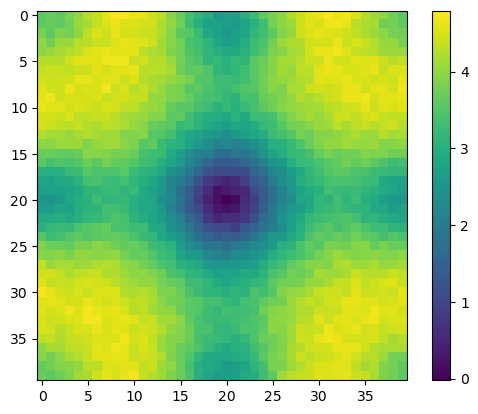

In [56]:
foo = flatpy.nD.available_functions["ackley"]
fractional_noise_level=20
persistence = 0.665
n_clusters = 9
count = 50
noise_level = 0.01*persistence*fractional_noise_level
noise_model = "uniform"
ground_truth, ensemble = utpy.utils.generate_ensemble(foo, noise_level, count, noise_model)
ensemble = ensemble
ground_truth = ground_truth
print(np.min(ground_truth))
img = plt.imshow(ensemble[:,:,10])
plt.colorbar(img)

Time: 2.2898190021514893


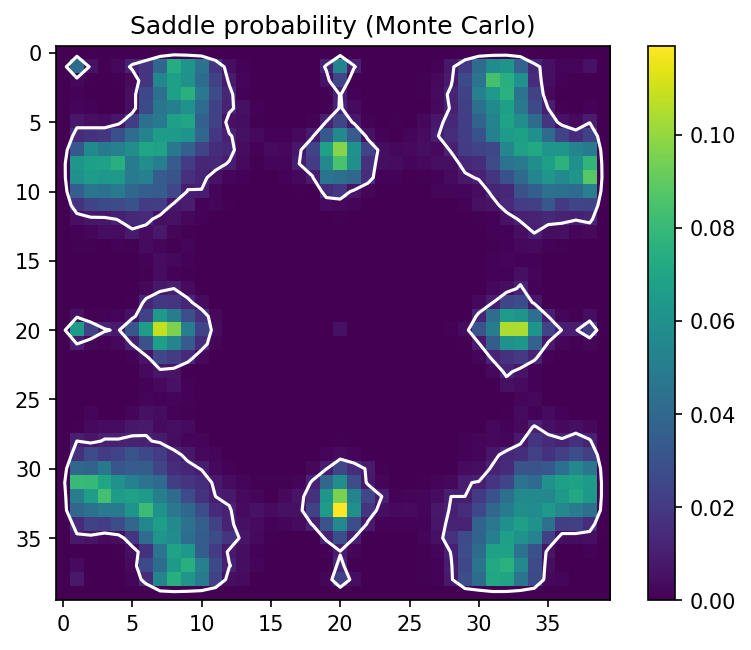

In [57]:
#Visualize saddle probabilities :  Monte Carlo

numSamples = 2000
start = time.time()
saddleProbabilitiesMonteCarlo = MCSaddleProbabilityIndependentUniformWithBoundaryNotHandled(ensemble, numSamples)
end = time.time()
print('Time:',end - start)
#localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
plt.figure()
plt.title('Saddle probability (Monte Carlo)')
img2 = plt.imshow(saddleProbabilitiesMonteCarlo)
#plt.gca().invert_yaxis()
plt.colorbar(img2)
plt.contour(saddleProbabilitiesMonteCarlo, levels=[0.01], colors='#FFFFFF')
plt.gcf().set_dpi(150)

Time: 0.04600095748901367
0.01581708238174906


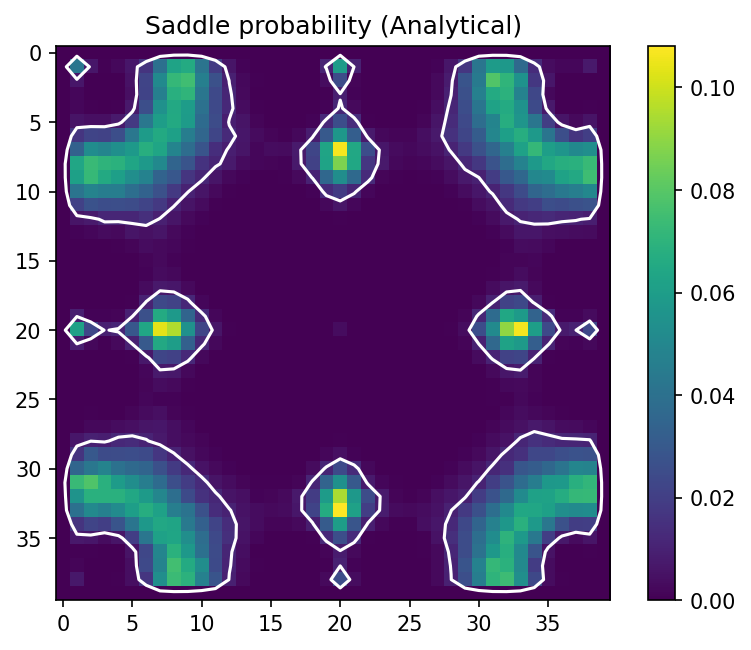

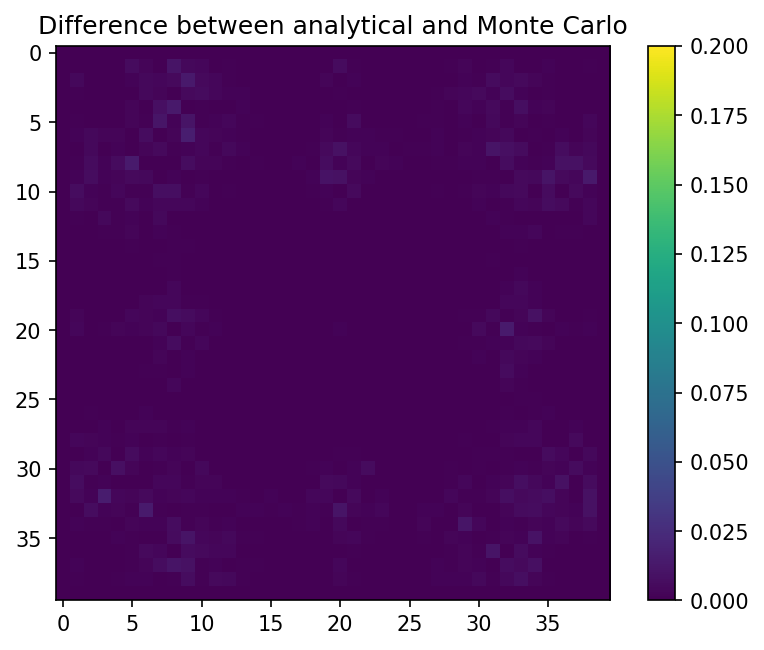

In [58]:
start = time.time()
saddleProbabilitiesAnalytical = analyticalSaddleProb(ensemble)
end = time.time()
print('Time:',end - start)
#localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
plt.figure()
plt.title('Saddle probability (Analytical)')
img2 = plt.imshow(saddleProbabilitiesAnalytical)
#plt.gca().invert_yaxis()
plt.colorbar(img2)
plt.contour(saddleProbabilitiesAnalytical, levels=[0.01], colors='#FFFFFF')
plt.gcf().set_dpi(150)

#Visualize difference between analytical and Monte Carlo
diffImg = np.abs(saddleProbabilitiesMonteCarlo - saddleProbabilitiesAnalytical)
print(np.amax(diffImg))
#localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
plt.figure()
plt.title('Difference between analytical and Monte Carlo')
img2 = plt.imshow(diffImg, vmin=0, vmax=0.2)
#plt.gca().invert_yaxis()
plt.colorbar(img2)
#plt.contour(localMaximumProbabilitiesMonteCarlo, levels=[0.1], colors='#FFFFFF')
plt.gcf().set_dpi(150)


h, w = saddleProbabilitiesAnalytical.shape
#for i in range(h):
#    for j in range(w):
#        if diffImg[i,j]>300:
#            print('i',i)
#            print('j',j)
            
            
#print(saddleProbabilitiesMonteCarlo[1,1])
#print(saddleProbabilitiesAnalytical[1,1])